Here we have more than two classes: 10 classes.
Let's import the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

/Users/fnuarjun/PycharmProjects/ML/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Import the Mnist dataset from the keras library. 

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)     # 3D array having 60k frames of 28*28 arrays.

(60000, 28, 28)
(10000, 28, 28)


Now we want to bring every feature in the similar range for fast convergence of the weights. 

In [5]:
print(X_train[0])
x_train = X_train/255            # Maximum value is 255 so now the range will be 0 to 1.
x_test = X_test/255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

The NN architecture:
-> One hidden layer having 128 dimensions and take 784 input_dim. But we have data in the format of 28*28. So now we have to flatten it. --> In Keras there is a flatten layer which converts higher dimensional array into 1D. 


In [6]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))       # If you have more than two class you use softmax activation function. 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


There is no trainable parameters at the flatten layer because there is no training happening. We are simply converting the 2D input data into 1D. 

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 1s 746us/step - loss: 0.1684 - accuracy: 0.9677 - val_loss: 0.4537 - val_accuracy: 0.9494
Epoch 2/20
1500/1500 [==============================] - 1s 696us/step - loss: 0.1639 - accuracy: 0.9670 - val_loss: 0.4309 - val_accuracy: 0.9510
Epoch 3/20
1500/1500 [==============================] - 1s 691us/step - loss: 0.1435 - accuracy: 0.9687 - val_loss: 0.4159 - val_accuracy: 0.9522
Epoch 4/20
1500/1500 [==============================] - 1s 691us/step - loss: 0.1485 - accuracy: 0.9678 - val_loss: 0.4271 - val_accuracy: 0.9507
Epoch 5/20
1500/1500 [==============================] - 1s 703us/step - loss: 0.1469 - accuracy: 0.9682 - val_loss: 0.4234 - val_accuracy: 0.9529
Epoch 6/20
1500/1500 [==============================] - 1s 710us/step - loss: 0.1377 - accuracy: 0.9703 - val_loss: 0.4472 - val_accuracy: 0.9542
Epoch 7/20
1500/1500 [==============================] - 1s 710us/step - loss: 0.1325 - accuracy: 0.9709 - val_loss: 0.4119 -

In [15]:
y_prob = model.predict(X_test)
print(y_prob.shape)

313/313 [==============================] - 0s 413us/step
(10000, 10)


It is giving me the probability of every class. Now we want to convert it into real class. 

In [16]:
y_pred = y_prob.argmax(axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy = {accuracy:.2f}%')

Accuracy = 95.64%


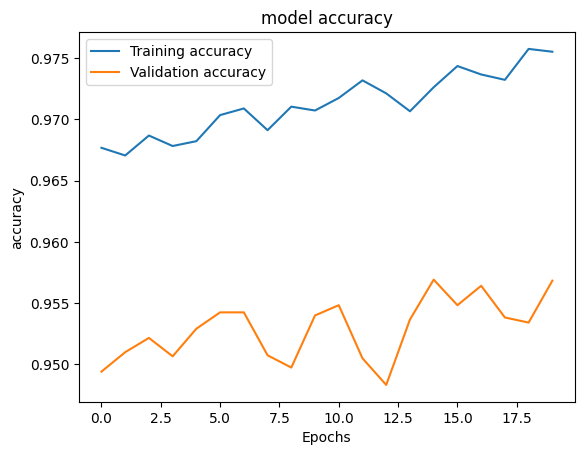

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()